## Load the CIFAR-10 Dataset & Pre-process It

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize images to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
train_generator = train_datagen.flow(x_train, y_train, batch_size=64)


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(16, (3,3), activation='relu', padding='valid', input_shape=(32, 32, 3)),
    Conv2D(16, (3,3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(32, (3,3), activation='relu', padding='valid'),
    Conv2D(32, (3,3), activation='relu', padding='valid'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(10, activation='softmax')
])


d:\Anaconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model for 5 epochs
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=(x_test, y_test)
)


d:\Anaconda3\envs\deep_learning\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 66ms/step - accuracy: 0.2916 - loss: 1.8965 - val_accuracy: 0.4662 - val_loss: 1.4907
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 88ms/step - accuracy: 0.4583 - loss: 1.4947 - val_accuracy: 0.5183 - val_loss: 1.3361
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5095 - loss: 1.3678 - val_accuracy: 0.5558 - val_loss: 1.2603
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 83ms/step - accuracy: 0.5473 - loss: 1.2713 - val_accuracy: 0.5824 - val_loss: 1.1885
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 84ms/step - accuracy: 0.5698 - loss: 1.2117 - val_accuracy: 0.5867 - val_loss: 1.1667


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler
import math

augmented_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)
train_generator = augmented_datagen.flow(x_train, y_train, batch_size=64)

def lr_schedule(epoch):
    initial_lr = 0.001
    return initial_lr * (0.9 ** epoch)

model_improved = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_improved.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_improved = model_improved.fit(
    train_generator,
    epochs=5,
    validation_data=(x_test, y_test),
    callbacks=[LearningRateScheduler(lr_schedule)]
)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 110s 133ms/step - accuracy: 0.3485 - loss: 1.9916 - val_accuracy: 0.5646 - val_loss: 1.2373 - learning_rate: 0.0010
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 103s 131ms/step - accuracy: 0.5551 - loss: 1.2546 - val_accuracy: 0.6285 - val_loss: 1.0686 - learning_rate: 9.0000e-04
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.6058 - loss: 1.1145 - val_accuracy: 0.6567 - val_loss: 1.0129 - learning_rate: 8.1000e-04
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.6498 - loss: 1.0030 - val_accuracy: 0.6567 - val_loss: 0.9698 - learning_rate: 7.2900e-04
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 104s 133ms/step - accuracy: 0.6695 - loss: 0.9414 - val_accuracy: 0.6681 - val_loss: 0.9551 - learning_rate: 6.5610e-04


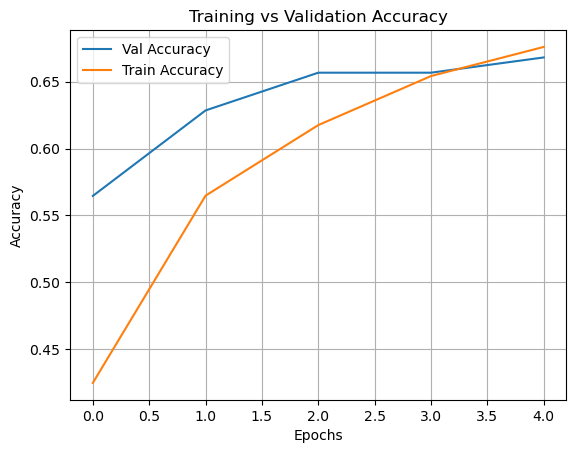

In [6]:
import matplotlib.pyplot as plt

plt.plot(history_improved.history['val_accuracy'], label='Val Accuracy')
plt.plot(history_improved.history['accuracy'], label='Train Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
